In [ ]:
#default_exp labelling.dfs_intervals

In [ ]:
#hide_output
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DFS Intervals Labelling
> _min-post_ intervals labeling and its extensions, as used in GRAIL, FERRARI (and PReaCH)

Imports for the module

In [ ]:
#export
import networkx as nx
from copy import deepcopy

## Definitions: out-tree, spanning tree / tree cover, etc.

![A tree in graph theory (Wikipedia)](https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Tree_graph.svg/162px-Tree_graph.svg.png)

In graph theory, a **tree** is an undirected graph in which any two vertices are connected by exactly one path, or equivalently a connected acyclic undirected graph.

<img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20171027092037172-0306:9781316105450:08931fig13_6.png?pub-status=live" width="60%"/>

In graph theory, a **directed rooted tree** or an **arborescence**, or **out-tree** is a directed graph in which, for a vertex $u$ called the root and any other vertex $v$, there is exactly one directed path from $u$ to $v$.  Equivalently, an arborescence is a directed, rooted tree in which all edges point away from the root.

Every directed rooted tree is a directed acyclic graph (DAG), but not every DAG is a tree.

> Note: here _root_ denotes a source node / verted, with in-degree of zero.

A **directed rooted forest** is a disjoint union of directed rooted trees.  It is called **branching** or **out-forest** if all its edges point away from the root in each rooted tree.

![A 4x4 grid graph and one of its spanning trees (Wikipedia)](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/4x4_grid_spanning_tree.svg/240px-4x4_grid_spanning_tree.svg.png)

In the mathematical field of graph theory, a **spanning tree** $T$ of an undirected graph $G$ is a subgraph that is a tree which includes all of the vertices of $G$, with a minimum possible number of edges.

A **full spanning forest** in an undirected graph (possibly not connected) is a maximal acyclic subgraph of the given graph, or equivalently a graph consisting of a spanning tree in each connected component of the graph.

Given a vertex $v$ on a directed multigraph $G$, an **oriented spanning out-tree**, or **tree cover** $T(G)$ rooted at $v$ is an acyclic subgraph of $G$ in which every vertex other than $v$ has in-degree 1.

![Small DAG with the spanning out-forest overlay and min-post intervals](images/colab/small_DAG_spanning_tree_min-post.png)

Given directed acyclic graph $G$, a **spanning forest**, or **oriented spanning out-forest** is such its subgraph,
for which the following is true:
- it includes all original (full) graph nodes
- there is at most one incoming edge per node (every vertex has in-degree 1 or 0)

## _min-post_ intervals in directed trees

The reachability problem on **_trees_** (out-forests) can be solved effectively by **interval labeling**,
which takes linear time and space for constructing the index,
and provides constant time querying.

It labels each node $u$ with a **_min-post_** range $I_u = [s_u, e_u]$,
where 
- $s_u$ denotes the rank of the node $u$ in a <em><u>post</u>-order traversal</em> of the tree,
  where the ranks are assumed to begin at 1,
  and all the children of a node are assumed to be ordered and fixed for that traversal.
  
  Note that the tree needs to be traversed in _depth-first search_ (DFS) manner.
  
- $s_u$ denotes the lowest rank for any node $x$,
  or in other words <em><u>min</u>imum</em> of DFS number of a node
  in the subtree rooted at $u$ (i.e., including $u$).

**Min-post interval** for a vertex (node) $u$ in a directed acyclic graph $G$,
denoted as $I(u) \equiv I_u = [s_u, e_u]$, can be computed in the following way:
- $e_u$ is defined as $e_u = \pi(u) = \text{post}(u)$, i.e. post-order value (back traversal) in DFS traversal
- $s_u = \pi(u) = e_u$ for leaf nodes, also known as sink nodes (no outcoming edges, out-degree 0),  
  otherwise $s_u = \min\{s_x \colon x \in \text{out-neighbours}(s)\}$
  (out-neighbours are sometimes called children).

Similarly, **max-pre interval** for a vertex (node) $u$ in a directed acyclic graph $G$,
denoted as $\text{range}(u) \equiv \hat{I}_u = [\hat{\phi}(u), \phi(u)]$, can be computed in the following way:
- $\phi(u)$ is defined as $\phi(u) = \text{pre}(u)$, i.e. pre-order value (forward traversal) in DFS traversal
- $\hat{\phi}(u) = \phi(u)$ for leaf nodes, also known as sink nodes (no outcoming edges, out-degree 0),  
  otherwise $\hat{\phi}(u) = \max\{\hat{\phi}(x) \colon x \in \text{out-neighbours}(s)\}$.

### Min-post interval properties for trees

For out-forests (directed forests) the containment between intervals
is equivalent to the reachability relationship between the nodes,
since the post-order DFS traversal enters a node before all of its descendants,
and leaves after having visited all of its descendants.

In other words, $u \leadsto v \iff I_v \subseteq I_u$

> Note: for trees it is enough to check that $s_v \in I_u$, because that is equivalent to checking $I_v \subseteq I_u$.

This means that the reachability query for trees can be answered in constant time.

Min-post and max-pre intervals for trees functions both as positive-cut and as negative-cut filter:
- if $I_v \subseteq I_u$, then $u$ can reach $v$ _(positive-cut filter)_
- if $u$ can reach $v$, then $I_v \subseteq I_u$ _(negative-cut filter)_

## _min-post_ intervals in directed acyclic graphs (DAGs)

The DFS **post-order** value (back traversal) induces topological sorting for a DAG.

This means that if $u$ can reach $v$ (i.e. $r(u,v)$ is true, or $u \leadsto v$), and $u \neq v$, then $\text{post}(u) > \text{post}(v)$.  
Conversely, if $\text{post}(u) < \text{post}(v)$, then $u$ cannot reach $v$ (_negative-cut_ filter).

![Commit graph with the spanning forest](images/slides/git_commit_graph-spanning_forest_first_parent.png)

For example, as shown in the above image, $n_{18} \leadsto n_{9}$, but $n_{18} \not\leadsto n_{19}$

### _min-post_ interval for a spanning tree _(positive-cut filter)_

For a directed acyclic graph $G$,
we define a **tree cover** (or **forest cover**) of $G$, denoted as $T(G) = (V_T, E_T)$,
as a directed spanning tree of $G$.

> Tip: if we want to have a tree cover rather than a forest,
> we can augment graph $G$ by introducing an artificial root node $r$
> that is connected to every node with no incoming edge:
> $$ G' := (V \cup \{r\}, E \cup \{(r,v) \colon v \in V, \text{indegree}(v) = 0\}) $$
> Note that this modification has no effect on the reachability relation among the existing nodes of $G$.

We define **min-post tree interval** as following

$$ I_v = \{\pi(w) \colon w \in V_{T_v}\} 
   = \left[ \min_{w \in V_{T_v}} \pi(w), \max_{w \in V_{T_v}} \pi(w) \right] 
   = \left[ \min_{w \in V_{T_v}} \pi(w), \pi(v) \right]$$
   
Here $T_v = (V_{T_v}, E_{T_v})$ denote the subtree of $T(G)$ rooted at node $v$.

The spanning forest, or tree cover, or out-forest $T(G)$ of directed acyclic graph $G$ has the following properties:
- if there exists a path from $u$ to $v$ in the spanning tree $T(G)$, then $u$ can reach $v$ in the full graph $G$
- but the path from $u$ to $v$ could require going through edges outside the spanning tree $T(G)$

The **_min-post tree interval labels_** have therefore the following properties:
- path from $u$ to $v$ in the spanning tree $T(G)$ exists if and only if $I_v \subseteq I_u$ (or $\pi(v) \in I_u$)
- if $I_v \subseteq I_u$, then $u \leadsto v$ ($u$ can reach $v$, also in the full graph $G$)

It can be therefore used as _positive-cut filter_.

Example:

![Small DAG with the spanning out-forest overlay and min-post intervals](images/colab/small_DAG_spanning_tree_min-post.png)

In the graph and its spanning tree shown in the above figure we have:
- $[3,3] \subseteq [1,5]$ then $a \leadsto h$,
- $[3,3] \not\subseteq [7,9]$, but $b \leadsto h$ (via out-of-tree edge)

Such interval is called **tree interval** or **exact interval** and denoted $I_T(u)$ in the FERRARI paper,  
and the corresponding max-pre interval as a range is called **full interval** (because every $v$ such that $\phi(v) \in I_T(u)$ is reachable from $v$) in the PReaCH paper

### _min-post_ interval for a DAG _(negative-cut filter)_

While above technique (min-post intervals) can be used to easily answer reachability queries on trees,
the case of general DAGs is much more challenging.

The reason is that, in general, the reachable set $\mathcal{R}(v)$ of a vertex $v$ in the DAG
(i.e. the set of vertices reachable from $v$: $\mathcal{R}(v) = \{u \in V\colon v \leadsto u\}$)
is only partly represented by the interval $I_T(v)$,
as the tree interval only accounts for reachability relationships that are preserved in $T$.
Vertices that can only be reached from a node $v$ by traversing one or more non-tree edges
have to be handled seperately: instead of merely storing the tree intervals $I_T(v)$,
every node $v$ is now assigned a set of intervals, denoted by $\mathcal{I}(v)$.
The purpose of this so-called **reachable interval set** is to capture the complete reachability information of a node.

Let's define the **approximate graph interval** as a single interval $\tilde{I}_G(v) = [\tilde{s}_u, \tilde{e}_u]$
approximating the reachable set $\mathcal{R}(u)$ of a vertex $u$ in the DAG from the above (i.e. $\mathcal{R}(u) \subseteq \tilde{I}_G(u)$)
in the following way:

$$ \tilde{I}_G(v) 
   = \left[ \min_{w \in \mathcal{R}(v)} \pi(w), \max_{w \in \mathcal{R}_v} \pi(w) \right] 
   = \left[ \min_{w \in V} \pi(w), \pi(v) \right]$$
   
The second part of the above equation is true for DFS traversal; the fact that the end of interval is simply post-traversal value $\pi(v)$ was mentioned earlier.

This **_min-post approximate graph interval_** has the following properties:
- if $u$ can reach $v$ (denoted as $u \leadsto v$), then $\tilde{I}_G(v) \subseteq \tilde{I}_G(u)$
- this means that if $\tilde{I}_G(v) \not\subseteq \tilde{I}_G(u)$, then $u$ cannot reach $v$ _(negative-cut filter)_

![Interval Labeling: Tree (a) and DAG: Single (b)](images/grail/GRAIL_vldb2010-fig2ab-interval_labeling_tree_and_DAG.png)

For example, part (a) of the figure above (taken from GRAIL paper) shows the _interval labeling on a tree_,
assuming that the children are ordered from left to right.
It is easy to see that reachability can be answered by interval containment.
For example, $1 \leadsto 9$, since $I_9 = [2, 2] \subset [1, 6] = L_1$,
but $2 \not\leadsto 7$, since $I_7 = [1, 3] \not\subseteq [7, 9] = L_2$.

For example, part (b) of the figure above shows an _interval labeling on a DAG_,
assuming a left to right ordering of the children.
As one can see, interval containment of nodes in a DAG is not exactly equivalent to reachability.
For example, $5 \not\leadsto 4$, but $\tilde{I}_4 = [1, 5] \subseteq [1, 8] = \tilde{I}_5$.
In other words, $\tilde{U}_v \subseteq \tilde{I}_u$ does not imply that $u \leadsto v$.
On the other hand, one can show that $\tilde{I}_v \not\subseteq \tilde{I}_u \implies u \not\leadsto v$.

## Extending _min-post_ intervals for graphs

This section describes various extensions to the _min-post_ intervals (DFS numbering) going beyond those negative-cut and positive-cut filters described above.

### Multiple intervals labelling: GRAIL (TODO)

### Extending interval labelling: PReaCH

The PReaCH paper extends min-post intervals labelling with approach slightly different from GRAIL, where instead of using additional DFS searches, additional extra labels are used.

**NOTE:** the PReaCH paper uses max-pre interval labelling instead of min-post one, but one can be translated into the other.

#### Original extension of max-pre intervals (Section 3.3 of PReaCH)

**Section 3.3 "*Pruning Based on DFS Numbering*" in the PReaCH paper.**

![Full and empty intervals derived from a DFS ordering](images/preach/PReaCH_arXiv-fig_3-full_and_empty_intervals_derived_from_DFS_numbering.png)

Let $\phi(v)$ denote the pre-visit DFS number of node $v$ and $\hat{\phi}(v)$ the largest DFS number of a node
in the subtree of the DFS tree rooted at $v$. The properties of DFS ensure that the nodes in
$\text{range}(v) := \phi(v)..\hat{\phi}(v)$ are all reachable from $v$ (they form the subtree of the DFS tree which
is rooted at $v$) and that no nodes with DFS number exceeding $\hat{\phi}(v)$ is reachable from $v$.

Let $u \to v$ denote that $r(u,v)$ is true, and $u \nrightarrow v$ that $r(u,v)$ is false.  
(We would use $u \leadsto v$/$u \rightsquigarrow v$, but $u \not\leadsto v$ is broken, and there is no $\nrightsquigarrow$).


*   $\forall v,t \in V \colon\ t \in \text{range}(v) \implies v \to t$  
    _(positive-cut)_
*   $\forall v,t \in V \colon\ \phi(t) > \hat{\phi}(v) \implies v \nrightarrow t$  
    _(negative-cut)_

Let's define node $w = p_{\text{tree}}(v)$ as the node that has $v \to w$ and $w \notin \text{range}(v)$
which maximizes $\lvert\text{range}(w)\rvert$.  Then, if $p_{\text{tree}}(v)$ exists

*   $\forall v,t \in V \colon\ p_{\text{tree}}(v) \neq \bot \land t \in \text{range}(p_{\text{tree}}(v)) \implies v \to t$  
    _(positive-cut)_
    
For any $v \in V$, let $\phi_{\text{min}}(v)$ denote the smallest DFS number of a node reachable from $v$ (including $v$). Then

*   $\forall v,t \in V \colon\ \phi(t) < \phi_{\text{min}}(v) \implies v \nrightarrow t$  
    _(negative-cut)_
    
We can also define $\phi_{\text{gap}}(v)$ in such way that

*   $\forall v,t \in V \colon\ \phi_{\text{gap}}(v) < \phi(t) < \phi(v) \implies v \nrightarrow t$  
    _(negative-cut)_
    
All those values: $\phi(v), \hat{\phi}(v), p_{\text{tree}}(v), \phi_{\text{min}}(v), \phi_{\text{gap}}(v)$ can be done while computing the DFS numbering.

**On choosing the DFS spanning-tree from PReaCH paper**

There are many ways to define a DFS ordering: We are free to choose the order in
which we scan the nodes for starting recursive exploration and we can choose the order in
which we inspect edges leaving a node being explored.

One heuristics that seems to be useful: Make sure that most nodes are in a small number of trees because this leads to large positive intervals. It therefore makes sense to only uses sources of the graph as tree roots.

In addition, one can order the sources by the number of nodes reached from them during the search for topological levels.

#### Translating PReaCH extension to min-post intervals

<!-- https://www.overleaf.com/project/5fd15159e5a50909877b2ddf -->
![Full and empty intervals derived from a post-visit DFS ordering](images/full_and_empty_intervals_derived_from_min-post_DFS_numbering.png)

Let $\pi(v)$ denote the post-visit DFS number of node $v$
and $\breve{\pi}(v)$ the smallest post-visit DFS number of a node
in the subtree of the DFS tree rooted at $v$.
The properties of DFS ensure that the nodes in $I_T(v) := \breve{\pi}(v)..\pi(v) = [\breve{\pi}(v),\pi(v)]$
are all reachable from $v$ (they form the subtree of the DFS tree which is rooted at $v$)
and that no nodes with DFS number exceeding $\pi(v)$ is reachable from $v$.

Let $u \to v$ denote that $r(u,v)$ is true, and $u \nrightarrow v$ that $r(u,v)$ is false.  

-   $\forall v,t \in V \colon\ t \in I_T(v) \implies v \to t$  
    _(positive-cut)_
-   $\forall v,t \in V \colon\ \pi(t) > \pi(v) \implies v \nrightarrow t$  
    _(negative-cut)_


Let's define node $w = p_{\text{tree}}(v) = p_{\text{t}}(v)$ as the node that has $v \to w$ and $w \notin I_T(v)$
which maximizes $\lvert I_T(w)\rvert$.  
Then, if $p_{\text{tree}}(v)$ exists (which we denote as $p_{\text{tree}}(v) \neq \bot$)

*   $\forall v,t \in V \colon\ p_{\text{tree}}(v) \neq \bot \land t \in I_T(p_{\text{tree}}(v)) \implies v \to t$  
    _(positive-cut)_
    
For any $v \in V$, let $\pi_{\text{min}}(v)$ denote
the smallest post-visit DFS number of a node reachable from $v$ (including $v$) in the graph.

> Note: with this notation we can say that $\tilde{I}_G(v) = [\pi_{\text{min}}(v), \pi(v)]$.

Then

*   $\forall v,t \in V \colon\ \pi(t) < \pi_{\text{min}}(v) \implies v \nrightarrow t$  
    _(negative-cut)_
    
We can also define $\pi_{\text{gap}}(v)$ in such way that

*   $\forall v,t \in V \colon\ \pi_{\text{gap}}(v) < \pi(t) < \pi(v) \implies v \nrightarrow t$  
    _(negative-cut)_
    
All those values: $\pi(v), \breve{\pi}(v), p_{\text{tree}}(v), \pi_{\text{min}}(v), \pi_{\text{gap}}(v)$ can be done while computing the DFS numbering.

### Extending interval labelling: FERRARI (TODO)

## Visualizing DFS intervals on example graphs

TODO

In [ ]:
# this is needed for example (small) graphs
import git_commit_graph_ext.example_graphs as graphs

In [ ]:
# this is needed only for demonstrations
import matplotlib.pyplot as plt

### Examples of spanning trees and min-post tree intervals labelling

Draw a small DAG (from FELINE paper) and its spanning tree, like on Figure 8 of the FELINE paper, together with its _min-post_ tree intervals.

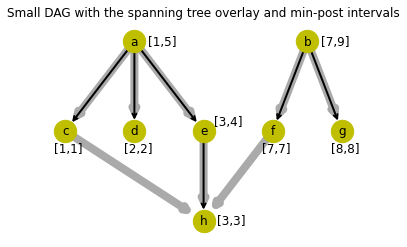

In [ ]:
#@title Draw a small DAG and its spanning-tree, as in Figure 8
from copy import deepcopy

plt.axis('off')
plt.title('Small DAG with the spanning tree overlay and min-post intervals')

sd=graphs.small_DAG_FELINE()
sd.tree={
  'a':(2,3),'b':(4.5,3),
  'c':(1,2),'d':(2,2),'e':(3,2),'f':(4,2),'g':(5,2),
  'h':(3,1)
}
nx.draw_networkx(sd,
                 pos=sd.tree,
                 node_size=500,width=8.0,
                 edge_color='#aaaaaa',node_color='y')
nx.draw_networkx_edges(sd,
                       pos=sd.tree,
                       edgelist=[
                            ('a','c'),('a','d'),('a','e'),
                            ('e','h'),
                            ('b','f'),('b','g')
                        ],
                        node_size=500,width=2.0,
                        arrowstyle='->')

sd.lpos=deepcopy(sd.tree)
for v in list('abh'):
  sd.lpos[v] = (sd.lpos[v][0]+0.40,sd.lpos[v][1])
for v in list('cdfg'):
  sd.lpos[v] = (sd.lpos[v][0]+0.05,sd.lpos[v][1]-0.2)
for v in list('e'):
  sd.lpos[v] = (sd.lpos[v][0]+0.35,sd.lpos[v][1]+0.1)
sd.mpi={
    'a':(1,5),'b':(7,9),
    'c':(1,1),'d':(2,2),'e':(3,4),'f':(7,7),'g':(8,8),
    'h':(3,3),
}
sd.mpi_labels={
  v:('[%d,%d]'%(i[0],i[1]))
  for (v,i) in sd.mpi.items()
}

nx.draw_networkx_labels(sd,
                        pos=sd.lpos,
                        labels=sd.mpi_labels)
plt.draw()

The above figure shows *Min-post indexing for a spanning tree* extracted from the small DAG of Figure 2 in the FELINE paper.  Each vertex is labeled with its *min-post* interval. Original edges of the DAG are marked in light gray.

For instance, consider the vertex $h$ of above figure.  We can conclude that the query $r(a,h)$ will return true ($a \leadsto h$), without search, because $[3,3] \subseteq  [1,5]$.  However, we can say nothing about the query $r(b,h)$, because there is no tree edge connecting the two vertices.

### Post-traversal index vs backward topological level drawing of example graphs

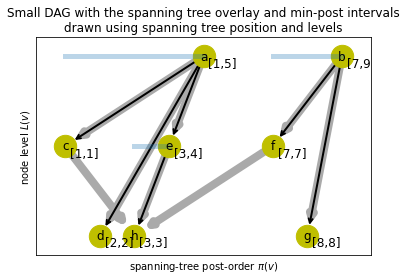

In [ ]:
from matplotlib.lines import Line2D

#plt.axis('off')
plt.title('Small DAG with the spanning tree overlay and min-post intervals\n'+
          'drawn using spanning tree position and levels')

sd=graphs.small_DAG_FELINE()
sd.lvl = {
    'h': 0, 'g': 0, 'd': 0,
    'c': 1, 'e': 1, 'f': 1,
    'a': 2, 'b': 2,
}
sd.mpi={
    'a':(1,5),'b':(7,9),
    'c':(1,1),'d':(2,2),'e':(3,4),'f':(7,7),'g':(8,8),
    'h':(3,3),
}
sd.mpi_labels={
  v:('[%d,%d]'%(i[0],i[1]))
  for (v,i) in sd.mpi.items()
}
sd.mpilvl={
  v: (sd.mpi[v][1],sd.lvl[v]) for v in sd
}

plt.xlabel('spanning-tree post-order $\pi(v)$')
plt.ylabel('node level $L(v)$')

ax=plt.gca()
for v in sd:
  if sd.mpi[v][0] == sd.mpi[v][1]:
    continue
  ax.add_line(Line2D([sd.mpi[v][0],sd.mpi[v][1]],
                     [sd.lvl[v],sd.lvl[v]],
                     lw=5., alpha=0.3))
  
nx.draw_networkx(sd,
                 pos=sd.mpilvl,
                 node_size=500,width=8.0,
                 edge_color='#aaaaaa',node_color='y')
edges=nx.draw_networkx_edges(sd,
                             pos=sd.mpilvl,
                             edgelist=[
                               ('a','c'),('a','d'),('a','e'),
                               ('e','h'),
                               ('b','f'),('b','g')
                             ],
                             node_size=500,width=2.0,
                             arrowstyle='->')

labels=nx.draw_networkx_labels(sd,
                               pos={u:(x+0.55,y-0.08) for (u,(x,y)) in sd.mpilvl.items()},
                               labels=sd.mpi_labels)

Commit graph with the spanning forest and min-post intervals:
- commit graph from the Stolee blog post  
  In the drawing of this graph below arrows (directed edges) point from right to left.  
  ![An example Git commit graph](images/stolee.dev/commit-graph-example.png)
  
- the same commit graph, but with the spanning forest (with the tree cover)  
  the vertices / nodes in this image are post-visit order, denoted $\text{post}(v) = \pi(v)$  
  numbered dashed lines denote the backward topological level (sink-based) of the vertex / node  
  ![Commit graph with the spanning forest](images/slides/git_commit_graph-spanning_forest_first_parent.png)
  
- The same graph, just drawn differently (post-visit order vs topological level)  
  with the spanning forrest, post-visit order as label, and min-post tree interval marked  
  ![Commit graph drawn with post-visit order vs level](images/slides/git_commit_graph-min-post_intervals.png)
  

## Computing DFS intervals labelling

Here there would be all code that automatically computes the spanning tree (or rather the spanning forest), also known as tree cover of a graph, and all the DFS numbering based labels.

### Computing the spanning tree

In [ ]:
#export
def find_dfs_spanning(G):
  """Find edges of the DFS spanning tree for graph G

  This is used to visualize the spanning tree (spanning forest,
  tree cover) in example small graphs.  This function is also used
  to compute DFS intervals, among others in `find_dfs_intervals()`

  Parameters
  ----------
  G : NetworkX graph
      Graph to find spanning-tree in.

  Returns
  -------
  edges : list
      A list of edges in the depth-first-search.

  Examples
  --------
  >>> G = nx.path_graph(5)
  >>> find_dfs_spanning(G)
  [(0, 1), (1, 2), (2, 3), (3, 4)]

  Notes
  -----
  The source is chosen arbitrarily and repeatedly until all
  components in the graph are searched.
  """
  # this may not cover all nodes
  return list(nx.dfs_edges(G))

Simple test that it works correctly for a very simple linear graph

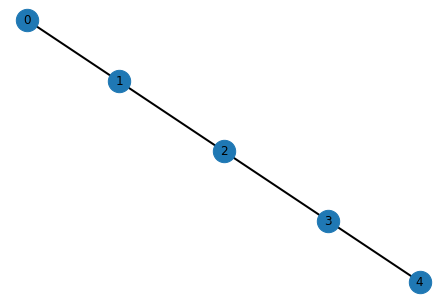

In [ ]:
nx.draw(nx.path_graph(5),with_labels=True,node_size=500,width=2.0)

In [ ]:
print(find_dfs_spanning(nx.path_graph(5)))
assert find_dfs_spanning(nx.path_graph(5)) == [(0, 1), (1, 2), (2, 3), (3, 4)]

[(0, 1), (1, 2), (2, 3), (3, 4)]


Visualize a spanning tree in undirected graph

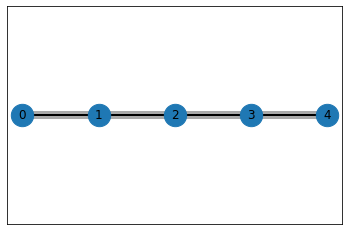

In [ ]:
G5=nx.path_graph(5)
G5.pos={v:(v,0) for v in range(5)}

nx.draw_networkx(G5,
                 pos=G5.pos,
                 node_size=500,width=8.0,
                 edge_color='#aaaaaa')
nx.draw_networkx_edges(G5,
                       pos=G5.pos,
                       edgelist=find_dfs_spanning(G5),
                       node_size=500,width=2.0,
                       arrowstyle='->')
plt.draw()

Draw a small DAG from the FELINE paper, and visualize automatically generated spanning tree (or rather one of the spanning trees)

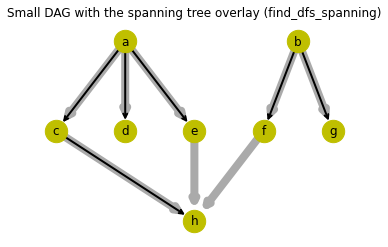

In [ ]:
#@title Draw a small DAG and its find_dfs_spanning

# get graph
sd=graphs.small_DAG_FELINE()
# TODO: move setting original positions to `small_DAG_FELINE()` to avoid repetitions
sd.tree={
  'a':(2,3),'b':(4.5,3),
  'c':(1,2),'d':(2,2),'e':(3,2),'f':(4,2),'g':(5,2),
  'h':(3,1)
}

# configure plot
plt.axis('off')
plt.title('Small DAG with the spanning tree overlay '+
          '(find_dfs_spanning)')

# draw graph and its spanning tree
nx.draw_networkx(sd,
                 pos=sd.tree,
                 node_size=500,width=8.0,
                 edge_color='#aaaaaa',node_color='y')
nx.draw_networkx_edges(sd,
                       pos=sd.tree,
                       edgelist=find_dfs_spanning(sd),
                       node_size=500,width=2.0,
                       arrowstyle='->')
plt.draw()

Draw a crown DAG, known as $S_0^3$ graph, used in FELINE paper as simple example of irreductible false-positive for FELINE labels

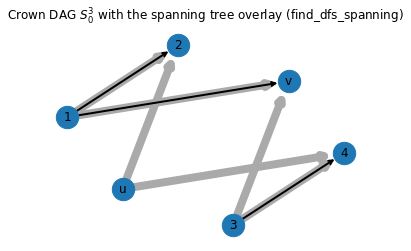

In [ ]:
# get graph
cd=graphs.crown_DAG()
cd.pos={1:(1,4),2:(3,6),'u':(2,2),3:(4,1),4:(6,3),'v':(5,5)}

# configure plot
plt.axis('off')
plt.title('Crown DAG $S_0^3$ with the spanning tree overlay '+
          '(find_dfs_spanning)')

# draw graph and its spanning tree
nx.draw_networkx(cd,
                 pos=cd.pos,
                 node_size=500,width=8.0,
                 edge_color='#aaaaaa')
nx.draw_networkx_edges(cd,
                       pos=cd.pos,
                       edgelist=find_dfs_spanning(cd),
                       node_size=500,width=2.0,
                       arrowstyle='->')
plt.draw()

Note that the last tree in the above spanning forest for $S_0^3$ crown DAG is not visible because if consist of a single vertex (node) $u$.

TODO: in the [Reachability labels for version control graphs](_Reachability_labels_for_version_control_graphs.ipynb) notebook from Google Colaboratory there are a few more examples to be copied, or replaced with interactive visualization (where you can choose the graph):

- draw a didactic example of DAG from FELINE
- draw DAG from level-filter example from FELINE

### Computing min-post tree intervals (positive-cut filter)

Interval labeling (*min-post* strategy) labels each node $u$ with a range $I_u = [s_u, e_u]$, where $e_u$ denotes the rank of the node $u$ in ***some*** post-order traversal of the tree, where the ranks are assumed to begin at 1, and all the children of a node are assumed to be ordered and fixed for that traversal. Further, $s_u$ denotes the lowest rank for any node $x$ in the subtree rooted at $u$ (i.e., including $u$).

For more see the section with the definitions.

In [ ]:
#export
def find_dfs_intervals(DG, attr=None):
  """Find min-post labeling of all vertices in graph G, using DFS spanning-tree

  Min-post interval labeling strategy labels each node 'u' in the directed
  spanning tree (DFS tree here) of the acyclic graph `DG` with a range
  I_u = [s_u, e_u], where e_u denotes the rank of the node 'u' in post-order
  traversal of the tree (ranks assumed to begin at 1), and s_u denotes the
  lowest rank of any node 'w' in the subtree rooted at 'u' (including 'u').

  Parameters:
  -----------
  DG : NetworkX DiGraph
      Directed acyclic graph.

  attr : str, optional (default=None)
      If set, name of a node attribute under which store min-post intervals.

  Returns:
  --------
  dict of two-element lists of ints
      Dictionary, where keys are node indices, and values are two element
      lists storing min-post interval (of integers)
  """
  ivl = {}
  # create graph of spanning tree (DFS spanning tree) of DG
  span=nx.DiGraph()
  span.add_nodes_from(DG)
  span.add_edges_from(find_dfs_spanning(DG))
  # DEBUG
  #print('span=%r' % find_dfs_spanning(DG))

  # any post-order ordering would be good
  nodelist = nx.dfs_postorder_nodes(DG)
  for pos, node in enumerate(nodelist, start=1):
    ivl[node] = [pos, pos]
    if span.out_degree(node) > 0:
      ivl[node][0] = min(pos,
                         *[ivl[neigh][0]
                           for neigh in span.successors(node)])
    # DEBUG
    #print('node=%s [%d,%d] -> %r' %
    #      (node, ivl[node][0],ivl[node][1],list(span.successors(node))))

  if attr is not None:
    for node, interval in ivl.items():
      DG.nodes[node][attr] = deepcopy(interval)

  return ivl

Check that there are no runtime errors when running `find_dfs_intervals(graph)`

In [ ]:
# DEBUG
sd=graphs.small_DAG_FELINE()
sd.mpi={
    'a':[1,5],'b':[7,9],
    'c':[1,1],'d':[2,2],'e':[3,4],'f':[7,7],'g':[8,8],
    'h':[3,3],
}

print('Exact results depend on the spanning tree (DFS traversal order)')
print('found intervals: %r' % find_dfs_intervals(sd))
print('provided ones:   %r' % sd.mpi)

Exact results depend on the spanning tree (DFS traversal order)
found intervals: {'h': [1, 1], 'c': [1, 2], 'd': [3, 3], 'e': [4, 4], 'a': [1, 5], 'f': [6, 6], 'g': [7, 7], 'b': [6, 8]}
provided ones:   {'a': [1, 5], 'b': [7, 9], 'c': [1, 1], 'd': [2, 2], 'e': [3, 4], 'f': [7, 7], 'g': [8, 8], 'h': [3, 3]}


Check visually that min-post tree intervals make sense for an example of small DAG from the FELINE paper

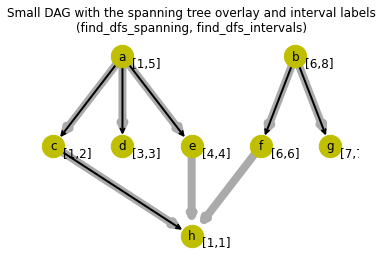

In [ ]:
# get graph
sd=graphs.small_DAG_FELINE()
# TODO: move setting original positions to `small_DAG_FELINE()` to avoid repetitions
sd.tree={
  'a':(2,3),'b':(4.5,3),
  'c':(1,2),'d':(2,2),'e':(3,2),'f':(4,2),'g':(5,2),
  'h':(3,1)
}

# find min-post intervals, and make labels
intervals=find_dfs_intervals(sd)
intervals_repr={
  v:('[%d,%d]'%(i[0],i[1]))
  for (v,i) in intervals.items()
}

# configure plot
plt.axis('off')
plt.title('Small DAG with the spanning tree overlay and interval labels\n'+
          '(find_dfs_spanning, find_dfs_intervals)')

# draw graph, its spanning tree and min-post tree interval labels
nx.draw_networkx(sd,
                 pos=sd.tree,
                 node_size=500,width=8.0,
                 edge_color='#aaaaaa',node_color='y')
nx.draw_networkx_edges(sd,
                       pos=sd.tree,
                       edgelist=find_dfs_spanning(sd),
                       node_size=500,width=2.0,
                       arrowstyle='->')
nx.draw_networkx_labels(sd,
                        pos={u:(x+0.35,y-0.08) for (u,(x,y)) in sd.tree.items()},
                        labels=intervals_repr)
plt.draw()

> TODO: 
> - interactive visualization of spanning tree and min-post tree intervals shown as labels
> - interactive visualization of post(v) vs level(v) drawn graph, with min-post intervals as labels

### Computing min-post graph intervals (negative-cut filter) (TODO)

### Computing PReaCH extensions to min-post intervals (TODO)

Code taken from [section "DFS spanning-tree extra data" in Google Colab version](https://colab.research.google.com/drive/1V-U7_slu5Z3s5iEEMFKhLXtaxSu5xyzg#scrollTo=4l0Ld0Jklq1o) of the [Reachability labels for version control graphs](_Reachability_labels_for_version_control_graphs.ipynb) notebook.

In [ ]:
#export
def find_dfs_intervals_extra(DG, extra=False):
    """Find DFS-derived data of all vertices in graph G

    Min-post interval labeling strategy labels each node 'u' in the directed
    spanning tree (DFS tree here) of the acyclic graph `DG` with a range
    I_u = [s_u, e_u], where e_u denotes the rank of the node 'u' in post-order
    traversal of the tree (ranks assumed to begin at 1), and s_u denotes the
    lowest rank of any node 'w' in the subtree rooted at 'u' (including 'u').
    This interval is stored under 'min' and 'post' keys in returned dict.

    For depth first-search (DFS) all nodes reachable from node 'u' have their
    topological ordering in DFS tree, i.e. 'post', smaller than the 'post'
    value for 'u'.  Additionally we can define 'f_min' as minimum 'post'
    number for each node reachable from 'u', and 'f_gap' as maximum 'post'
    number of nodes reachable from 'u' that are not in DFS subtree rooted
    at 'u' or None if 'f_gap' would be equal to 'u' node's 'min' number.

    We can also define 'p_tree' to be node reachable from 'u', but not in
    subtree rooted at 'u', that ('p_tree') has largest subtree.  If such
    node does not exist it is set to None.  For DFS spanning tree we can
    calculate this value effectively.

    This is based on *modified* algorithms from PReaCH paper [1];
    note that the original version in the paper [1] uses
    preorder not postorder numbers (pre-max not min-post).

    References:
    -----------
    [1] Florian Merz, Peter Sanders "PReaCH: A Fast Lightweight
        Reachability Index using Pruning and Contraction Hierarchies" (2014)
        In: Schulz A.S., Wagner D. (eds) Algorithms - ESA 2014. ESA 2014.
        Lecture Notes in Computer Science, vol 8737. Springer, Berlin,
        Heidelberg (Conference Paper: European Symposium on Algorithms)
        https://doi.org/10.1007/978-3-662-44777-2_58
        http://arxiv.org/abs/1404.4465

    Parameters:
    -----------
    DG : NetworkX DiGraph
        Directed acyclic graph.

    extra : bool, optional (default=False)
        Whether to compute extra DFS data in addition to min-post interval.

    Returns:
    --------
    dict of dicts
        Dictionary, where keys are node indices, and values are dictionaries
        with various DFS spanning-tree derived data.
    """
    data = {}
    # create graph of spanning tree (DFS spanning tree) of DG
    span = nx.DiGraph()
    span.add_nodes_from(DG)
    span.add_edges_from(find_dfs_spanning(DG))

    # needs depth-first search for some of indices to actually work
    nodelist = nx.dfs_postorder_nodes(DG)
    for pos, node in enumerate(nodelist, start=1):
        data[node] = {}

        # DEBUG
        # print('node=%s\n -> %r\n => %r' %
        #      (node,
        #       list(span.successors(node)),
        #       list(DG.successors(node))))

        data[node]['post'] = pos
        if span.out_degree(node) == 0:
            data[node]['min'] = pos
        else:
            data[node]['min'] = min(pos,
                                    *[data[neigh]['min']
                                      for neigh in span.successors(node)])

        # print("data[%s]: %r" % (node, data[node]))

        # min-post graph interval (min over whole graph)
        if DG.out_degree(node) == 0:
            data[node]['f_min'] = pos
        else:
            data[node]['f_min'] = min(pos,
                                      *[data[neigh]['f_min']
                                        for neigh in DG.successors(node)])

        # PReaCH specific extensions
        if not extra:
            continue

        if DG.out_degree(node) == 0:
            data[node]['f_gap'] = None
            data[node]['p_tree'] = None
        else:
            f_gap_candidates = \
                [data[neigh]['post']
                 for neigh in DG.successors(node)
                 if data[neigh]['post'] < data[node]['min']] + \
                [data[neigh]['f_gap']
                 for neigh in DG.successors(node)
                 if data[neigh]['f_gap'] is not None]
            if f_gap_candidates:
                data[node]['f_gap'] = max(f_gap_candidates)
            else:
                data[node]['f_gap'] = None
            # print("f_gap[%s]: %r" % (node, data[node]['f_gap']))

            # print("p_tree: %r (candidates, part 1)" %
            #      [data[neigh]['p_tree']
            #       for neigh in DG.successors(node)])
            p_tree_candidates = \
                [data[neigh]['p_tree']
                 for neigh in DG.successors(node)
                 if data[neigh]['p_tree'] is not None and
                    data[neigh]['post'] < data[node]['min']] + \
                [neigh
                 for neigh in DG.successors(node)
                 if data[neigh]['post'] < data[node]['min']]
            if p_tree_candidates:
                data[node]['p_tree'] = max(
                    p_tree_candidates,
                    key=lambda n: data[n]['post'] - data[n]['min']
                )
                # print("p_tree[%s]: %r" % (node, data[node]['p_tree']))
            else:
                data[node]['p_tree'] = None

        # print("\n")

    return data

In [ ]:
# DEBUG
sd=graphs.small_DAG_FELINE()
find_dfs_intervals_extra(sd, extra=True)

{'h': {'post': 1, 'min': 1, 'f_min': 1, 'f_gap': None, 'p_tree': None},
 'c': {'post': 2, 'min': 1, 'f_min': 1, 'f_gap': None, 'p_tree': None},
 'd': {'post': 3, 'min': 3, 'f_min': 3, 'f_gap': None, 'p_tree': None},
 'e': {'post': 4, 'min': 4, 'f_min': 1, 'f_gap': 1, 'p_tree': 'h'},
 'a': {'post': 5, 'min': 1, 'f_min': 1, 'f_gap': 1, 'p_tree': None},
 'f': {'post': 6, 'min': 6, 'f_min': 1, 'f_gap': 1, 'p_tree': 'h'},
 'g': {'post': 7, 'min': 7, 'f_min': 7, 'f_gap': None, 'p_tree': None},
 'b': {'post': 8, 'min': 6, 'f_min': 1, 'f_gap': 1, 'p_tree': None}}

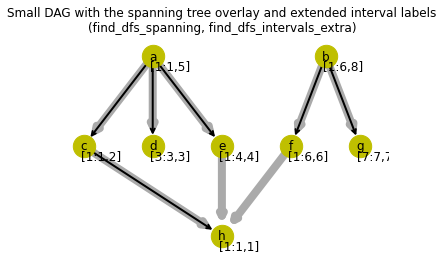

In [ ]:
# get graph
sd=graphs.small_DAG_FELINE()
# TODO: move setting original positions to `small_DAG_FELINE()` to avoid repetitions
sd.tree={
  'a':(2,3),'b':(4.5,3),
  'c':(1,2),'d':(2,2),'e':(3,2),'f':(4,2),'g':(5,2),
  'h':(3,1)
}

# find min-post intervals, and make labels
intervals=find_dfs_intervals_extra(sd)
intervals_repr={
  v:('[%d:%d,%d]'%(i['f_min'],i['min'],i['post']))
  for (v,i) in intervals.items()
}

# configure plot
plt.axis('off')
plt.title('Small DAG with the spanning tree overlay and extended interval labels\n'+
          '(find_dfs_spanning, find_dfs_intervals_extra)')

# draw graph, its spanning tree and min-post tree interval labels
nx.draw_networkx(sd,
                 pos=sd.tree,
                 node_size=500,width=8.0,
                 edge_color='#aaaaaa',node_color='y')
nx.draw_networkx_edges(sd,
                       pos=sd.tree,
                       edgelist=find_dfs_spanning(sd),
                       node_size=500,width=2.0,
                       arrowstyle='->')
nx.draw_networkx_labels(sd,
                        pos={u:(x+0.25,y-0.12) for (u,(x,y)) in sd.tree.items()},
                        labels=intervals_repr)
plt.draw()

## References

TODO

- **\[PReaCH\]** 
  Florian Merz, Peter Sanders:
  "_PReaCH: A Fast Lightweight Reachability Index using Pruning and Contraction Hierarchies_" (2014)  
  In: Schulz A.S., Wagner D. (eds) Algorithms - ESA 2014. ESA 2014.
  Lecture Notes in Computer Science, vol 8737.  
  Springer, Berlin, Heidelberg (Conference Paper: European Symposium on Algorithms)  
  <https://doi.org/10.1007/978-3-662-44777-2_58>
  
  arXiv:1404.4465v1 \[cs.DS\], 17 Apr 2014,  
  <http://arxiv.org/abs/1404.4465>

----

In [ ]:
#hide
# this should be the last cell of the notebook
from nbdev.export import notebook2script
notebook2script()

Converted 01_tools.ipynb.
Converted 02_related.ipynb.
Converted 03_example_graphs.ipynb.
Converted 05_reachability_index.ipynb.
Converted 06_levels.ipynb.
Converted 07_interval_labels.ipynb.
Converted 08_reach.ipynb.
Converted index.ipynb.
